# Базовое решение Задачи "Разработка нефтегазовых месторождений"

Набор данных содержит 442 о различных нефтегазовых месторождениях.
Тренировочный набор - 309 строк.
Тестовый набор - 133 строк.

Каждое месторождение обладает 19 параметрами:
1. Field name - название месторождения
2. Reservoir unit - юнит месторождения
3. Country - страна расположения
4. Region - регион расположения
5. Basin name - название бассейна пород
6. Tectonic regime - тектонический режим
7. Latitude - широта
8. Longitude - долгота
9. Operator company - название компании
10. Onshore or oﬀshore - на суше или нет
11. Hydrocarbon type (main) - тип углеводорода
12. Reservoir status (current) - статус месторождения
13. Structural setting - структурные свойства
14. Depth (top reservoir ft TVD) - глубина
15. Reservoir period - литологический период
16. Lithology (main) - литология
17. Thickness (gross average ft) - общая толщина
18. Thickness (net pay average ft) - эффективная толщина
19. Porosity (matrix average 20. Permeability (air average mD) – проницаемость

## Считывание данных

In [1]:
# Установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

In [4]:
import opendatasets as od

# Загрузим датасет на прямую с kaggle
dataset_url = 'https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields'
# {"username":"adele1997","key":"72a5b06391529c16b0e444311c9af408"}
# Upload Kaggle.json file to Colab… (Caution: Do not Share kaggle.json as contains API key of your Kaggle Account)

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········


100%|██████████| 24.4k/24.4k [00:00<00:00, 28.9MB/s]


Extracting archive ./classification-of-oil-and-gas-fields/classification-of-oil-and-gas-fields.zip to ./classification-of-oil-and-gas-fields


In [5]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Считываем тренировочные данные
train = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")
test = pd.read_csv("/content/classification-of-oil-and-gas-fields/oil_test.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (309, 20)
Test dataset shape: (133, 19)


In [7]:
# Посмотрим как выглядят данные
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


## Исследование и обработка данных

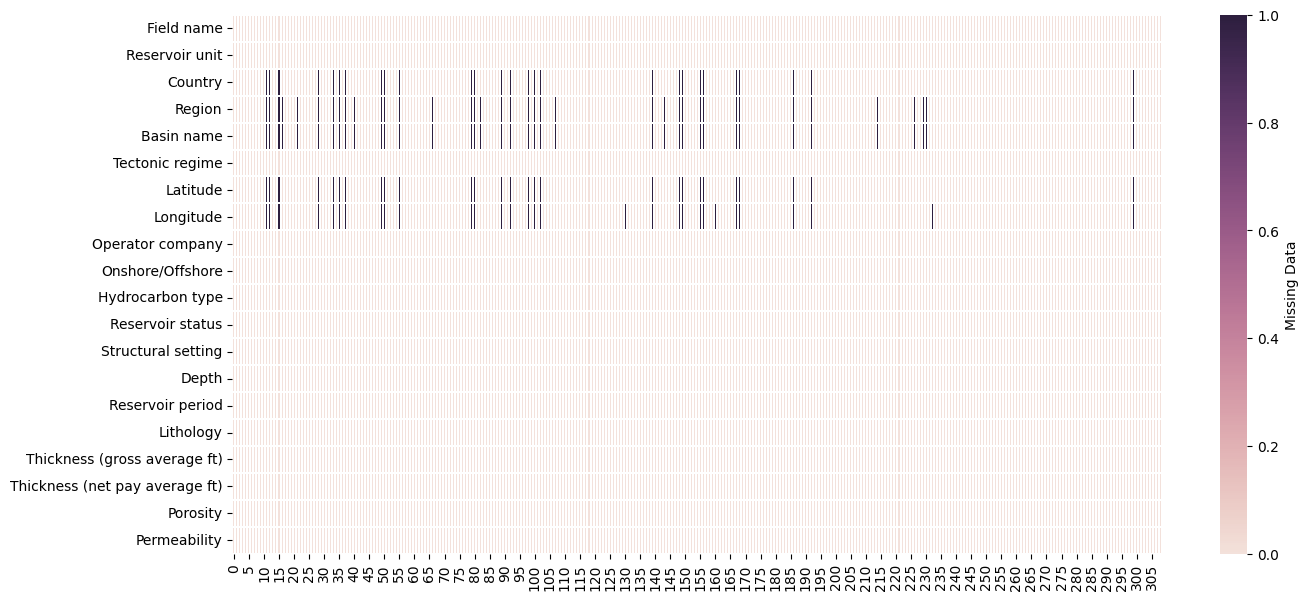

In [8]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

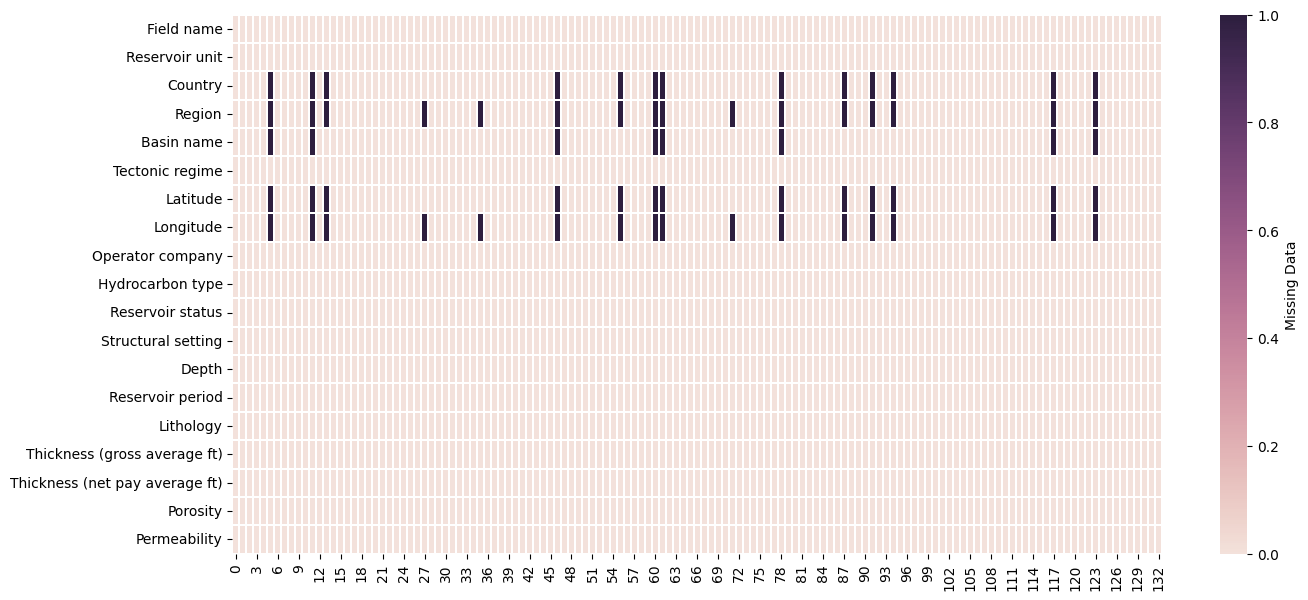

In [9]:
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(test.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'}, linewidths=0.05)

plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [10]:
print(train.shape)
train = train.dropna()
print(train.shape)

(309, 20)
(268, 20)


### Обработка категориальных признаков

In [ ]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
train['Tectonic regime'].value_counts()

COMPRESSION                                                 57
EXTENSION                                                   26
COMPRESSION/EROSION                                         25
COMPRESSION/EVAPORITE                                       18
INVERSION/COMPRESSION/EXTENSION                             17
EXTENSION/EROSION                                           12
GRAVITY/EXTENSION/EVAPORITE                                 10
COMPRESSION/EVAPORITE/EXTENSION/LINKED                       7
GRAVITY/EXTENSION/EVAPORITE/SYNSEDIMENTATION                 7
INVERSION/COMPRESSION/EXTENSION/EROSION                      7
INVERSION/STRIKE-SLIP/TRANSPRESSION/EXTENSION/BASEMENT-I     5
COMPRESSION/EXTENSION/LINKED                                 4
GRAVITY/EVAPORITE/COMPRESSION                                4
INVERSION/COMPRESSION/EXTENSION/EVAPORITE                    4
GRAVITY/EVAPORITE/EXTENSION                                  4
EXTENSION/EVAPORITE/EROSION/GRAVITY                    

Как мы видим в колонке 'Tectonic regime' множество разных категорий, причем одному объекту может соответствовать несколько категорий сразу.

Встает вопрос как обработать такие признаки.

In [ ]:
train['Structural setting'].value_counts()

FORELAND                      67
RIFT                          43
INTRACRATONIC                 27
THRUST                        14
PASSIVE MARGIN                12
SALT/FORELAND                 11
SALT/PASSIVE MARGIN            9
INVERSION/RIFT                 7
DELTA/PASSIVE MARGIN           7
INVERSION/BACKARC              6
SALT/INVERSION/RIFT            5
DELTA/SALT/PASSIVE MARGIN      5
THRUST/FORELAND                4
SUB-THRUST/FORELAND            4
RIFT/SALT                      4
RIFT/INVERSION                 3
SUB-SALT/RIFT                  3
SUB-SALT/FORELAND              3
WRENCH                         3
BACKARC                        3
SALT/RIFT                      2
FORELAND/SALT                  2
FORELAND/THRUST                2
THRUST/SUB-THRUST/FORELAND     2
SUB-SALT/INVERSION             2
SUB-THRUST                     2
WRENCH/DELTA                   2
SUB-SALT                       1
INVERSION/FORELAND             1
RIFT/PASSIVE MARGIN            1
SALT/INVER

In [ ]:
train['Basin name'].value_counts()

WESTERN CANADA                     24
GULF OF MEXICO NORTHERN ONSHORE    19
NORTH SEA CENTRAL                  14
NORTH SEA NORTHERN                 12
PERMIAN                            10
                                   ..
SIERRA GRANDE UPLIFT                1
FORT WORTH                          1
OTWAY                               1
UINTA/PICEANCE                      1
UINTA                               1
Name: Basin name, Length: 92, dtype: int64

In [ ]:
train = train.drop(columns=['Tectonic regime', 'Structural setting', 'Field name', 'Reservoir unit', 'Country',
                            'Region', 'Basin name', 'Operator company'])
test = test.drop(columns=['Tectonic regime', 'Structural setting', 'Field name', 'Reservoir unit', 'Country',
                            'Region', 'Basin name', 'Operator company'])

train.head()

,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,ONSHORE,OIL,DECLINING PRODUCTION,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,ONSHORE,OIL,NEARLY DEPLETED,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,ONSHORE,OIL,REJUVENATING,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OFFSHORE,OIL,NEARLY DEPLETED,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,ONSHORE,OIL,UNKNOWN,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [ ]:
train['Hydrocarbon type'].value_counts()

OIL               200
GAS                40
GAS-CONDENSATE     26
CARBON DIOXIDE      2
Name: Hydrocarbon type, dtype: int64

In [ ]:
train['Field name'].value_counts()

ERSKINE             3
LAOJUNMIAO          3
ELK BASIN           2
HIBERNIA            2
SAIH RAWL           2
                   ..
SHANSHAN            1
HUTTON NORTHWEST    1
WANGCHANG           1
IAGIFU-HEDINIA      1
WELL DRAW           1
Name: Field name, Length: 251, dtype: int64

In [ ]:
train['Reservoir unit'].value_counts()

BRENT                        8
SAN ANDRES                   7
SHUAIBA                      5
TOR-EKOFISK                  4
LEMAN SANDSTONE              4
                            ..
WATT MOUNTAIN (GILWOOD A)    1
LOWER GANCHAIGOU             1
ZELTEN                       1
BATURAJA                     1
MESAVERDE (TEAPOT SAND)      1
Name: Reservoir unit, Length: 258, dtype: int64

In [ ]:
train['Country'].value_counts()

USA                    77
CANADA                 33
CHINA                  19
UK                     19
RUSSIA                 16
NORWAY                 11
INDONESIA               9
AUSTRALIA               7
OMAN                    6
EGYPT                   6
BRAZIL                  5
FRANCE                  5
TURKMENISTAN            5
UAE                     4
INDIA                   4
VENEZUELA               4
QATAR                   3
KAZAKHSTAN              3
NIGERIA                 2
TUNISIA                 2
PAPUA NEW GUINEA        2
NEUTRAL ZONE            2
SAUDI ARABIA            2
MALAYSIA                2
LIBYA                   2
COLOMBIA                2
THAILAND                2
TUNISIA /ALGERIA        1
IRAQ                    1
DENMARK                 1
SOUTH AFRICA            1
AFGHANISTAN             1
TURKEY                  1
EQUATORIAL GUINEA       1
GABON                   1
UK /NORWAY              1
IRAN                    1
TRINIDAD AND TOBAGO     1
UZBEKISTAN  

<ipython-input-9-5203504ebcd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train['Hydrocarbon type'], ax=ax[0], palette='hls')
<ipython-input-9-5203504ebcd4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train['Onshore/Offshore'], ax=ax[1], palette='hls')


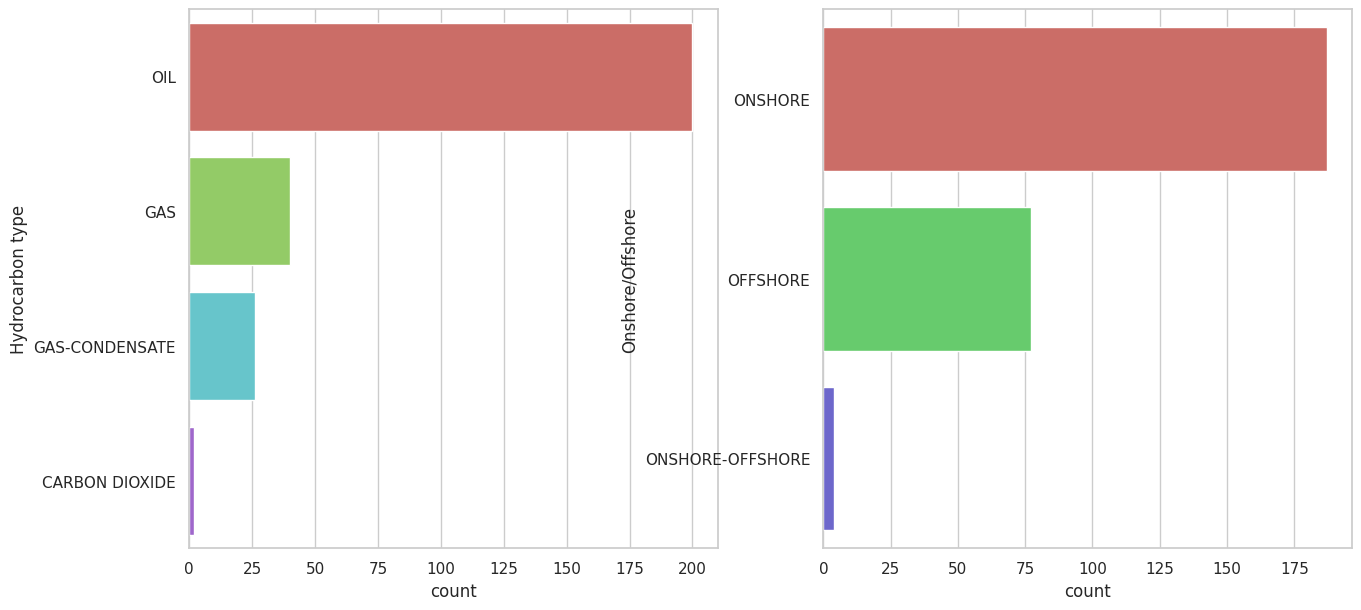

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

fig, ax = plt.subplots(1,2, figsize=(15, 7))

sns.countplot(train['Hydrocarbon type'], ax=ax[0], palette='hls')
sns.countplot(train['Onshore/Offshore'], ax=ax[1], palette='hls')
fig.show()

In [ ]:
train['Onshore/Offshore'].value_counts()

,count
Onshore/Offshore,
ONSHORE,187
OFFSHORE,77
ONSHORE-OFFSHORE,4


Остальные категориальные признаки устроены проще и к ним можно применить обычные методы кодирования, которые мы изучали до этого.

Применим к ним кодировщик LabelEncoder().

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Список категориальных столбцов
categ = ['Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology']

# Создаем OrdinalEncoder, обрабатываем неизвестные категории специальным значением -1
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Обучаем на тренировочных данных и преобразуем сразу train и test
train_encoded = encoder.fit_transform(train[categ])
test_encoded = encoder.transform(test[categ])

# Заменяем старые категориальные столбцы новыми закодированными
train[categ] = train_encoded
test[categ] = test_encoded

In [ ]:
train

,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,ONSHORE,3.0,2.0,1870,1.0,7.0,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,ONSHORE,3.0,6.0,4843,13.0,7.0,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,ONSHORE,3.0,8.0,6050,8.0,5.0,250.0,184.0,21.0,410.0
3,61.3833,1.7500,OFFSHORE,3.0,6.0,8988,8.0,7.0,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,ONSHORE,3.0,12.0,9306,5.0,3.0,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,-6.0136,142.8409,ONSHORE,2.0,1.0,9905,9.0,7.0,490.0,240.0,10.0,100.0
305,76.4462,-108.9172,ONSHORE,1.0,11.0,3390,8.0,7.0,100.0,71.0,20.0,566.0
306,40.3000,-110.2100,ONSHORE,3.0,5.0,15250,13.0,7.0,8000.0,575.0,5.0,0.1
307,45.1039,-105.0967,ONSHORE,3.0,6.0,4300,3.0,7.0,45.0,23.0,28.5,2250.0


In [ ]:
test

,Latitude,Longitude,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,29.7422,28.4925,2.0,5.0,10282,3.0,7.0,745.0,144.0,10.0,8.0
1,31.4382,31.3616,1.0,2.0,10499,11.0,7.0,509.0,410.0,20.0,300.0
2,48.4740,57.6667,3.0,4.0,6000,1.0,5.0,300.0,105.0,10.0,20.0
3,60.7833,1.7333,3.0,6.0,9790,8.0,7.0,886.0,344.0,17.0,500.0
4,21.6000,72.9167,3.0,5.0,2950,13.0,7.0,670.0,0.0,21.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...
128,37.9167,118.4333,3.0,6.0,5970,12.0,3.0,560.0,82.0,2.5,8.4
129,35.0461,-119.1904,3.0,6.0,11100,11.0,11.0,200.0,150.0,20.0,75.0
130,38.2100,117.0600,3.0,5.0,5384,13.0,7.0,230.0,69.0,26.7,1872.0
131,38.2100,117.0600,3.0,2.0,4721,13.0,7.0,164.0,62.0,23.2,121.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Onshore/Offshore'] = le.fit_transform(train['Onshore/Offshore'])

train

,Latitude,Longitude,Onshore/Offshore,Hydrocarbon type,Reservoir status,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,51.0000,44.8042,1,3.0,2.0,1870,1.0,7.0,262.0,33.0,24.0,30.0
1,-19.6017,-39.8332,1,3.0,6.0,4843,13.0,7.0,2133.0,72.0,23.0,350.0
2,26.0800,49.8100,1,3.0,8.0,6050,8.0,5.0,250.0,184.0,21.0,410.0
3,61.3833,1.7500,0,3.0,6.0,8988,8.0,7.0,425.0,300.0,22.0,750.0
4,53.2287,-115.8008,1,3.0,12.0,9306,5.0,3.0,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,-6.0136,142.8409,1,2.0,1.0,9905,9.0,7.0,490.0,240.0,10.0,100.0
305,76.4462,-108.9172,1,1.0,11.0,3390,8.0,7.0,100.0,71.0,20.0,566.0
306,40.3000,-110.2100,1,3.0,5.0,15250,13.0,7.0,8000.0,575.0,5.0,0.1
307,45.1039,-105.0967,1,3.0,6.0,4300,3.0,7.0,45.0,23.0,28.5,2250.0


Heatmap позволяет визуадизировать матрицу корреляции между данными.

Корреляция - важнейший фактор, лежащий в основе анализа данных. Он сообщает, как переменные в наборе данных связаны друг с другом и как они перемещаются относительно друг друга. Значение корреляции колеблется от -1 до +1. 0 Корреляция означает, что две переменные не зависят друг от друга. Положительная корреляция указывает на то, что переменные движутся в одном направлении, а отрицательная корреляция указывает на противоположное.

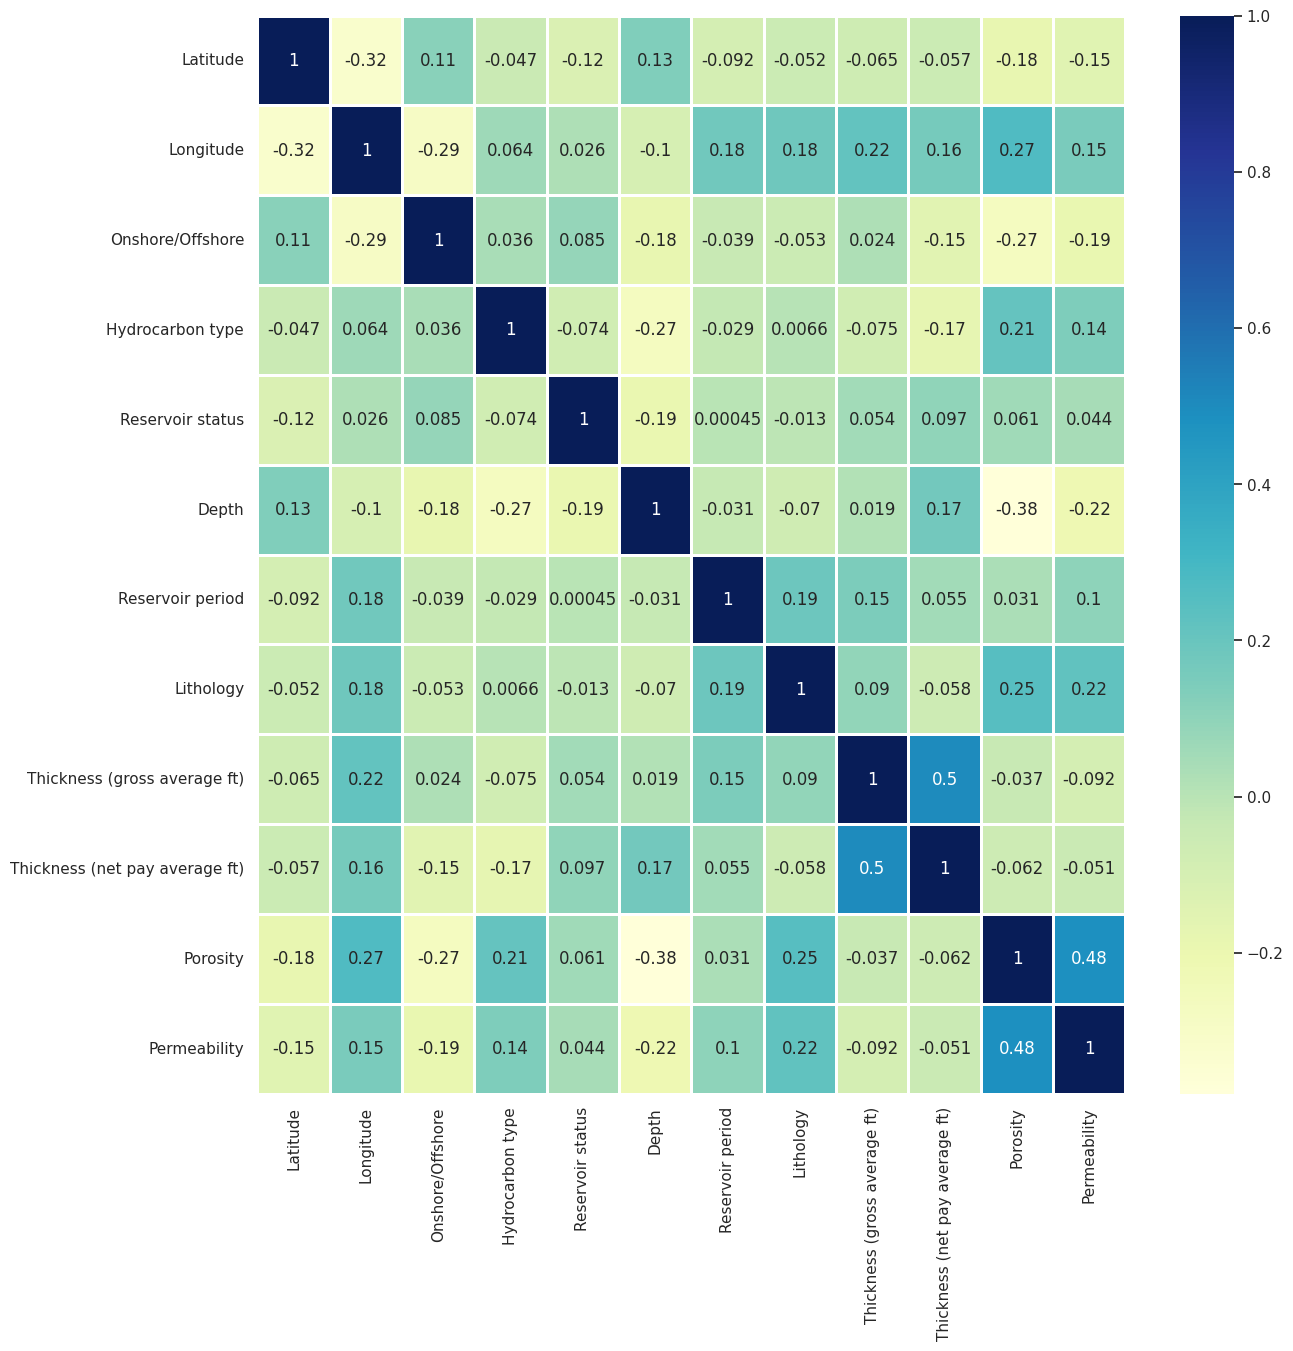

In [ ]:
sns.set(rc = {'figure.figsize':(14, 14)})

sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

plt.savefig("heatmap.png")

По сути, это сетка цветных квадратов , где каждый квадрат, или bin , отмечает пересечение значений двух переменных, которые простираются вдоль горизонтальной и вертикальной осей.

Цветовые палитры: https://seaborn.pydata.org/tutorial/color_palettes.html

Информация о HeatMap: https://seaborn.pydata.org/generated/seaborn.heatmap.html


In [ ]:
# train.columns

Index(['Field name', 'Reservoir unit', 'Country', 'Region', 'Basin name',
       'Latitude', 'Longitude', 'Operator company', 'Onshore/Offshore',
       'Reservoir status', 'Depth', 'Thickness (gross average ft)',
       'Thickness (net pay average ft)', 'Porosity', 'Permeability',
       'Hydrocarbon type_CARBON DIOXIDE', 'Hydrocarbon type_GAS',
       'Hydrocarbon type_GAS-CONDENSATE', 'Hydrocarbon type_OIL',
       'Reservoir period_CAMBRIAN', 'Reservoir period_CAMBRIAN-ORDOVICIAN',
       'Reservoir period_CARBONIFEROUS',
       'Reservoir period_CARBONIFEROUS-PERMIAN', 'Reservoir period_CRETACEOUS',
       'Reservoir period_CRETACEOUS-PALEOGENE', 'Reservoir period_DEVONIAN',
       'Reservoir period_DEVONIAN-CARBONIFEROUS',
       'Reservoir period_DEVONIAN-PERMIAN', 'Reservoir period_JURASSIC',
       'Reservoir period_JURASSIC-CRETACEOUS', 'Reservoir period_MESOZOIC',
       'Reservoir period_NEOGENE', 'Reservoir period_ORDOVICIAN',
       'Reservoir period_PALEOGENE', 'Reservoi

In [ ]:
# sns.set()
# columns = ['Onshore/Offshore', 'Reservoir status', 'Depth', 'Lithology_CHALK', 'Reservoir period_CRETACEOUS-PALEOGENE',
#            'Thickness (gross average ft)', 'Thickness (net pay average ft)', 'Porosity', 'Permeability', 'Region', 'Latitude', 'Longitude']

# sns.pairplot(train[columns], size = 4, kind ='scatter', diag_kind='kde')
# plt.show()

# plt.savefig("pairplot.png")

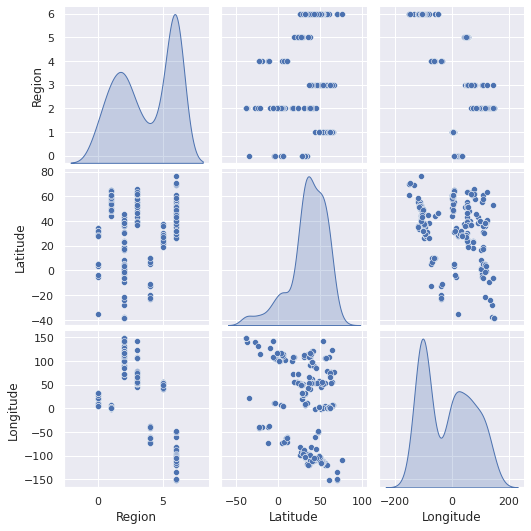

In [ ]:
# sns.set()
# columns = ['Region', 'Latitude', 'Longitude']

# sns.pairplot(train[columns], kind ='scatter', diag_kind='kde')
# plt.show()

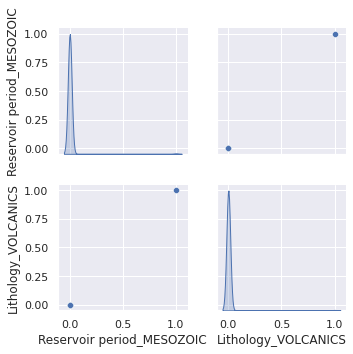

In [ ]:
# sns.set()
# columns = ['Reservoir period_MESOZOIC', 'Lithology_VOLCANICS']

# sns.pairplot(train[columns], kind ='scatter', diag_kind='kde')
# plt.show()

Посмотрим на баланс классов.

<ipython-input-10-8c25235e347f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')


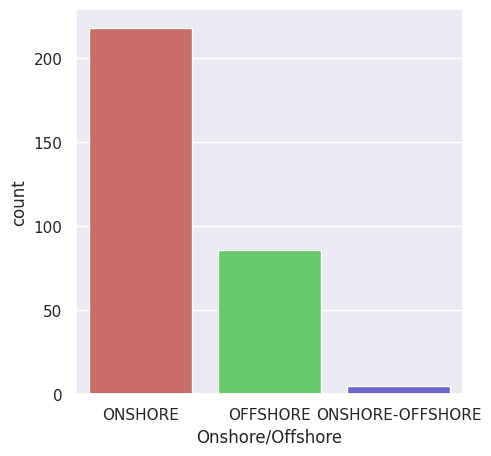

In [ ]:
sns.set(rc = {'figure.figsize':(5,5)})
y_data = pd.DataFrame(train['Onshore/Offshore'])
sns.countplot(x='Onshore/Offshore', data=y_data, palette='hls')
plt.show()

In [ ]:
train['Onshore/Offshore'].value_counts()

NameError: name 'train' is not defined

In [ ]:
# train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Latitude,Longitude,Operator company,Onshore/Offshore,Reservoir status,...,Lithology_DOLOMITE,Lithology_DOLOMITIC LIMESTONE,Lithology_LIMESTONE,Lithology_LOW-RESISTIVITY SANDSTONE,Lithology_SANDSTONE,Lithology_SHALE,Lithology_SHALY SANDSTONE,Lithology_SILTSTONE,Lithology_THINLY-BEDDED SANDSTONE,Lithology_VOLCANICS
0,ZHIRNOV,MELEKESKIAN,RUSSIA,3,VOLGA-URAL,51.0000,44.8042,NIZHNEVOLZHSKNET,1,2,...,0,0,0,0,1,0,0,0,0,0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,4,ESPIRITO SANTO,-19.6017,-39.8332,PETROBRAS,1,6,...,0,0,0,0,1,0,0,0,0,0
2,ABQAIQ,ARAB D,SAUDI ARABIA,5,THE GULF,26.0800,49.8100,SAUDI ARAMCO,1,8,...,0,0,1,0,0,0,0,0,0,0
3,MURCHISON,BRENT,UK /NORWAY,1,NORTH SEA NORTHERN,61.3833,1.7500,CNR,0,6,...,0,0,0,0,1,0,0,0,0,0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,6,WESTERN CANADA,53.2287,-115.8008,NUMEROUS,1,12,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# train = train.drop(columns=['Field name','Reservoir unit', 'Country','Basin name', 'Operator company'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 308
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        268 non-null    float64
 1   Longitude                       268 non-null    float64
 2   Onshore/Offshore                268 non-null    int64  
 3   Hydrocarbon type                268 non-null    float64
 4   Reservoir status                268 non-null    float64
 5   Depth                           268 non-null    int64  
 6   Reservoir period                268 non-null    float64
 7   Lithology                       268 non-null    float64
 8   Thickness (gross average ft)    268 non-null    float64
 9   Thickness (net pay average ft)  268 non-null    float64
 10  Porosity                        268 non-null    float64
 11  Permeability                    268 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 27

## Обучение модели

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Onshore/Offshore'])
y = train['Onshore/Offshore']

# Разбиваем данные с учетом стратификации
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% данных в тест
    random_state=42,         # Фиксируем для воспроизводимости
    stratify=y               # Стратифицированное разбиение
)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (214, 11), (214,)
Train dataset size: (54, 11), (54,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Создадим модель дерева решений
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(2)

# обучение модели
tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

# предсказание ответов для тестовой выборки
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [ ]:
y_test.value_counts()

,count
Onshore/Offshore,
1,38
0,15
2,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y_test, y_pred_tree)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')

Accuracy: 0.8148148148148148
Accuracy: 0.6111111111111112


In [ ]:
import numpy as np

np.unique(y_train)

array([0, 1, 2])

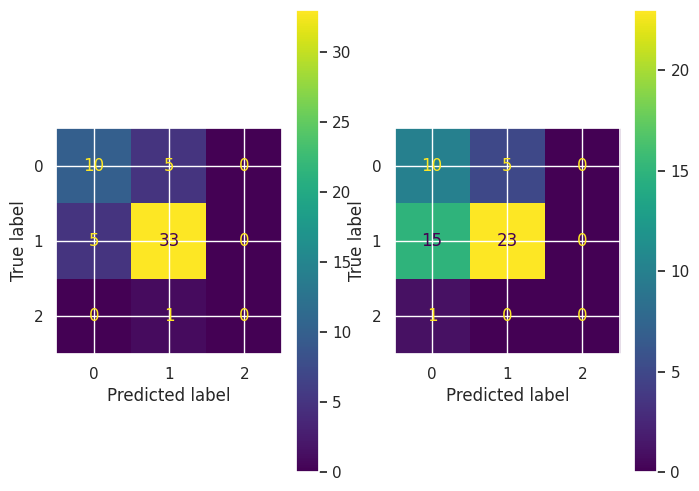

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix_tree, display_labels=tree.classes_)
display.plot(ax=axes[0])

display = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=knn.classes_)
display.plot(ax=axes[1])

In [ ]:
y_test_pred = tree.predict(test)
ans_df = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore '])

ans_df.reset_index(inplace=True)
ans_df.to_csv('submition.csv', index=False)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       1])

In [ ]:
ans_df = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore '])

ans_df.reset_index(inplace=True)
ans_df.to_csv('submition.csv', index=False)